# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement

#### Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### Importing Libraries

In [180]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [181]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\1st week\WA_Fn-UseC_-HR-Employee-Attrition.csv') 

In [182]:
df.head() # to display data from top 5 rows only 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Dataset Description

1 --  Age (in years)
2 --  Attrition  (Yes=0, No=1)
3 --  BusinessTravel
4 --  DailyRate
5 --  Department
6 --  DistanceFromHome
7 --  Education
8 --  EducationField
9 --  EmployeeCount
10 -- EmployeeNumber
11 -- EnvironmentSatisfaction
12 -- Gender
13 -- HourlyRate
14 -- JobInvolvement 
15 -- JobLevel
16 -- JobRole
17 -- JobSatisfaction
18 -- MaritalStatus
19 -- MonthlyIncome
20 -- MonthlyRate 
21 -- NumCompaniesWorked
22 -- Over18
23 -- OverTime
24 -- PercentSalaryHike
25 -- PerformanceRating
26 -- RelationshipSatisfaction
27 -- StandardHours
28 -- StockOptionLevel
29 -- TotalWorkingYears
30 -- TrainingTimesLastYear
31 -- WorkLifeBalance
32 -- YearsAtCompany
33 -- YearsInCurrentRole 
34 -- YearsSinceLastPromotion
35 -- YearsWithCurrManager
       

In [183]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (1470, 35)


In [184]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [185]:
df.isnull().sum()  # to check null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### There is no null values in the dataset

In [186]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [187]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [188]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='int64']
con_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [189]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### For age column we can expect min value to be 18 and max value to be 60 which is the correct age to start work and retire in corporate world. Employee count and Standard hours has only one value throughout so it will be dropped later 

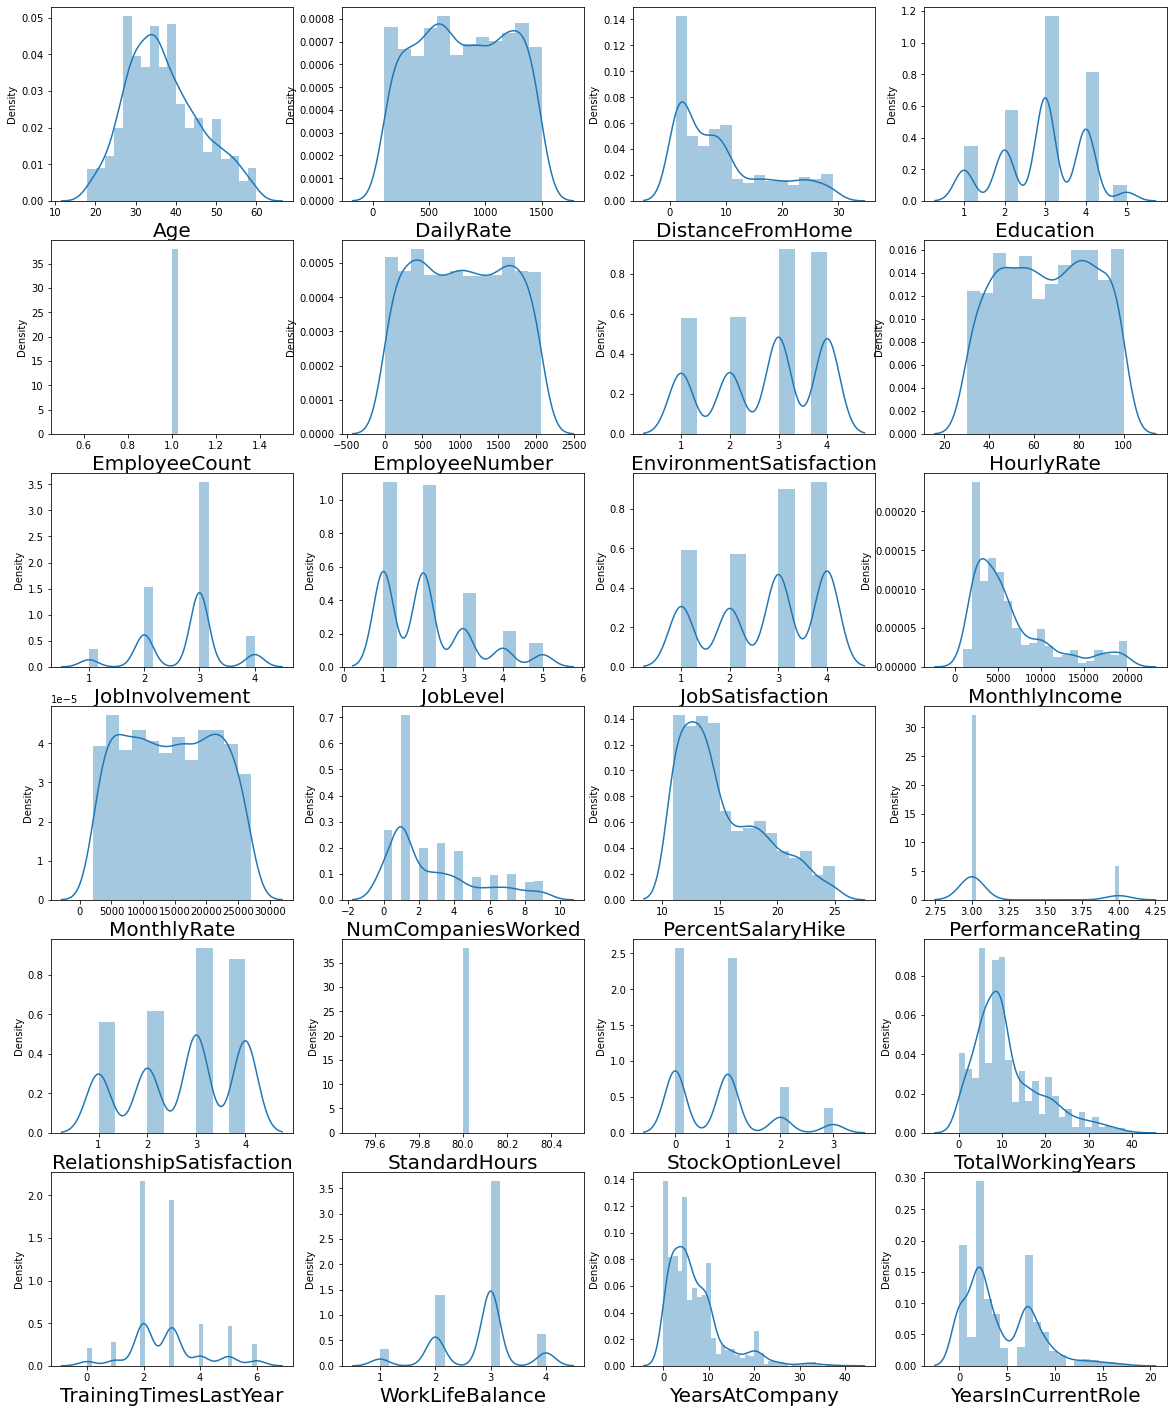

In [190]:
# lets visualize how data is distributed in every continous column 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df[con_features]:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Distance from Home, Years at Company, Years in Current Role is right skewed, the data distribution for columns having one value throughout will be ignored as stated earlier and rest categorical columns looks fine 

In [191]:
# to drop features/columns 'Employee Count' and 'Standard Hours' 
df=df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'])

In [192]:
df.shape

(1470, 32)

## Visualizing for every categorical columns in the data set

No     1233
Yes     237
Name: Attrition, dtype: int64

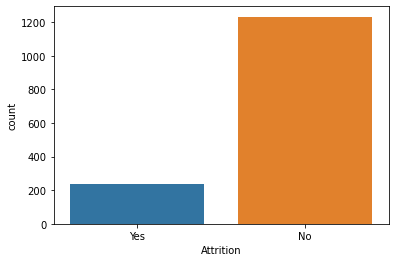

In [193]:
sns.countplot(df['Attrition'])  # Lets visualize the Attrition column 
df['Attrition'].value_counts()  # to count exact number of employees attrition

#### Employees still with the company = 1233 , Employees left the company = 237

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

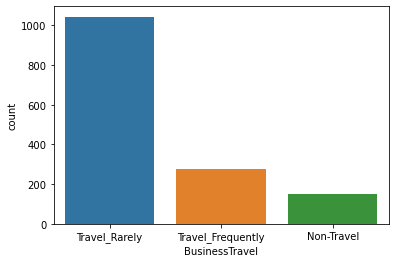

In [194]:
sns.countplot(df['BusinessTravel']) # lets visualize and see frequency for each categorical data of Business Travel using bars.
df['BusinessTravel'].value_counts() # to count number of employees related to travelling

#### From the count of unique values its clear that number of employees in travel rarely category is more than the rest

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

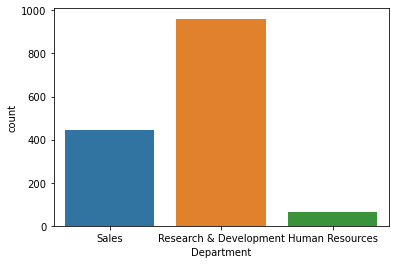

In [195]:
# to visualize and count for the department column
sns.countplot(df['Department'])
df['Department'].value_counts()

#### Employees in Research & Development is more than other department categories

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

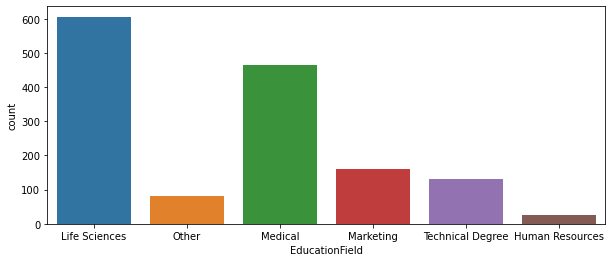

In [196]:
# lets visualize for Education field column
plt.subplots(figsize=(10,4))
sns.countplot(df['EducationField'])
df['EducationField'].value_counts()

#### From graph its clear that Life Science and Medical background Employees were large in number

Male      882
Female    588
Name: Gender, dtype: int64

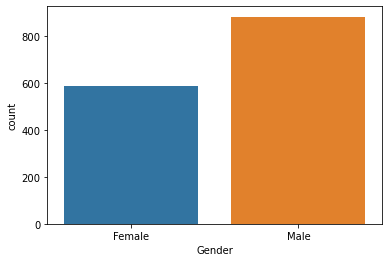

In [197]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

#### The number of male employees is more then female employees in terms of workforce

3    1244
4     226
Name: PerformanceRating, dtype: int64

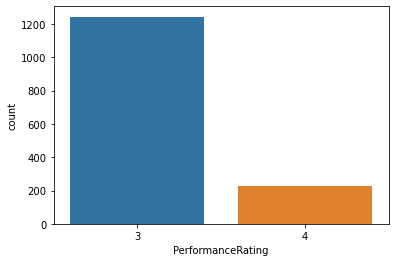

In [198]:
sns.countplot(df['PerformanceRating'])
df['PerformanceRating'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

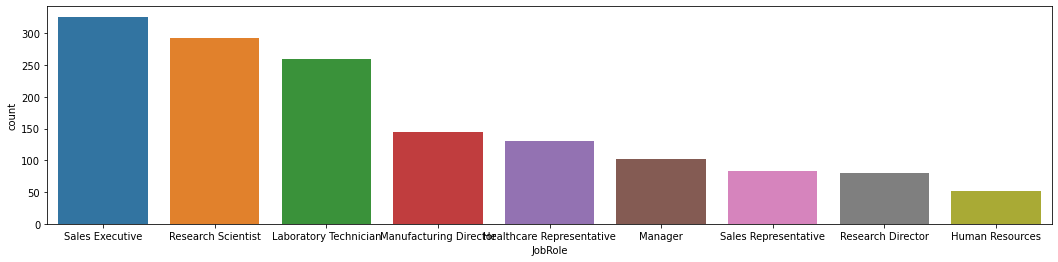

In [199]:
# to visualize
plt.subplots(figsize=(18,4))
sns.countplot(df['JobRole'])
# to count total no of roles/positions of all employees in a categorical order 
df['JobRole'].value_counts()

#### This graph above shows different job roles that employees hold in which Sales Executive,Research Scientist and Technician has the highest counting from other job roles.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

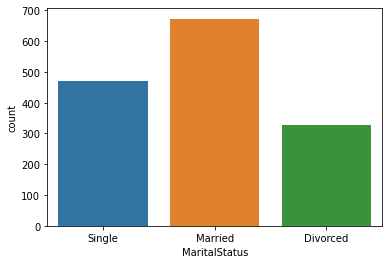

In [200]:
sns.countplot(df['MaritalStatus'])
df['MaritalStatus'].value_counts()

#### you could see lot of married working employees from the above graph

In [201]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [202]:
#### Over18 column has only one unique value throughout. so we will drop this column
df=df.drop(columns=['Over18'])

No     1054
Yes     416
Name: OverTime, dtype: int64

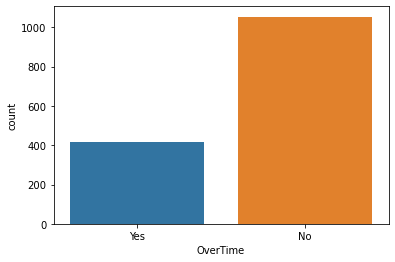

In [203]:
sns.countplot(df['OverTime'])
df['OverTime'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

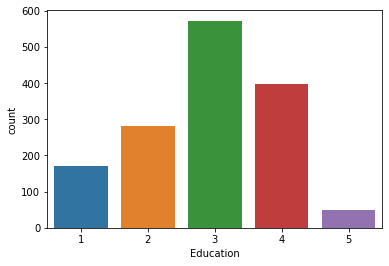

In [204]:
sns.countplot(df['Education'])
df['Education'].value_counts()

### Lets check some features vs target/label through visualization

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

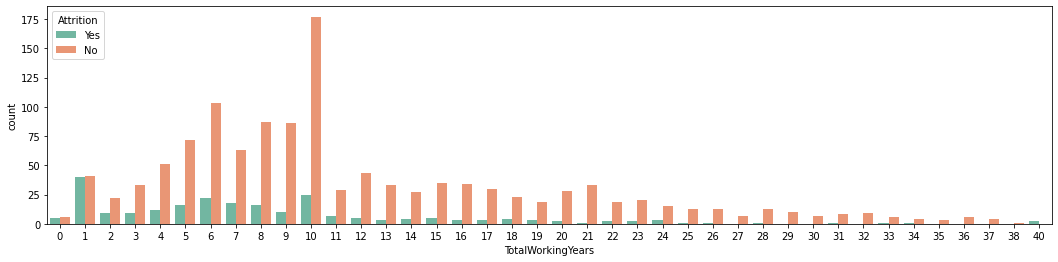

In [205]:
# TotalWorkingYears vs [target(Attrition)]
plt.subplots(figsize=(18,4))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df, palette='Set2')

#### The above graph shows that employees with very less working years left the company. Maximum left after completing 1 year only

<AxesSubplot:xlabel='Age', ylabel='count'>

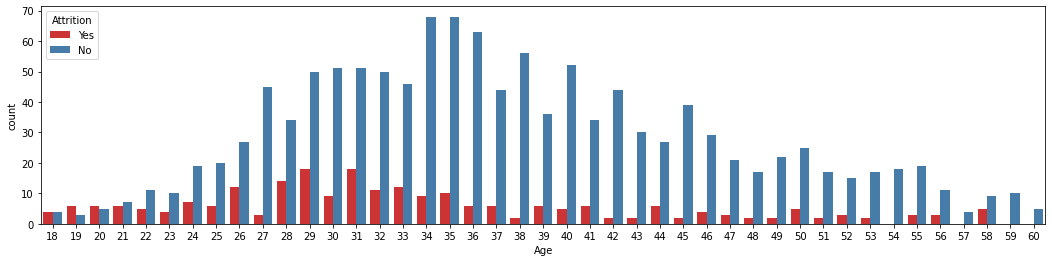

In [206]:
# Age vs [target(Attrition)]
plt.subplots(figsize=(18,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='Set1')

#### The above graph shows that employees with age ranging from(28-35) left the company maximum in number.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

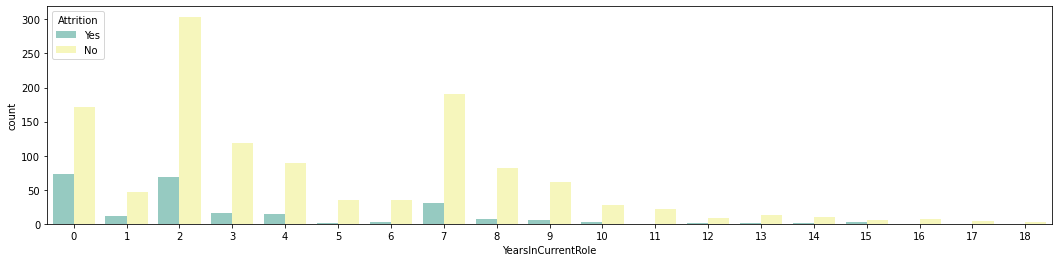

In [207]:
# YearsInCurrentRole vs [target(Attrition)]
plt.subplots(figsize=(18,4))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set3')

#### Attrition of employees can be seen in 2nd and 7th year if employee is in its current role, for 0th year the reason might vary on various aspects.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

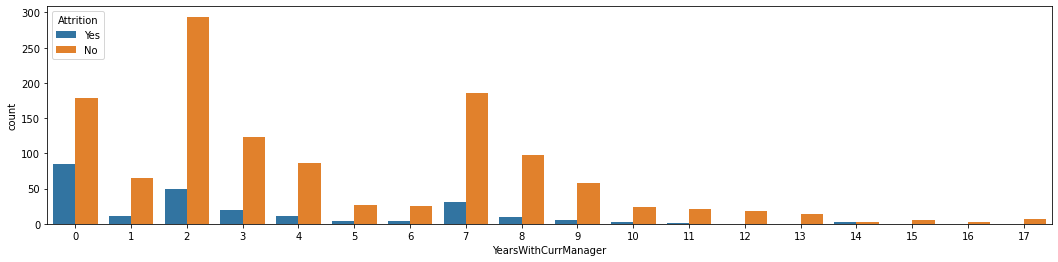

In [208]:
# YearsWithCurrManager vs [target(Attrition)]
plt.subplots(figsize=(18,4))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df)

#### we can draw an inference that the chances of attrition is less if employees is with his current manager for longer period of time

In [209]:
# converting object into integers
df['Attrition']= pd.get_dummies(df["Attrition"]) 
df['BusinessTravel']= pd.get_dummies(df["BusinessTravel"]) 
df['Department']= pd.get_dummies(df["Department"]) 
df['EducationField']= pd.get_dummies(df["EducationField"]) 
df['Gender']= pd.get_dummies(df["Gender"]) 
df['JobRole']= pd.get_dummies(df["JobRole"]) 
df['MaritalStatus']= pd.get_dummies(df["MaritalStatus"])
df['OverTime']= pd.get_dummies(df["OverTime"])

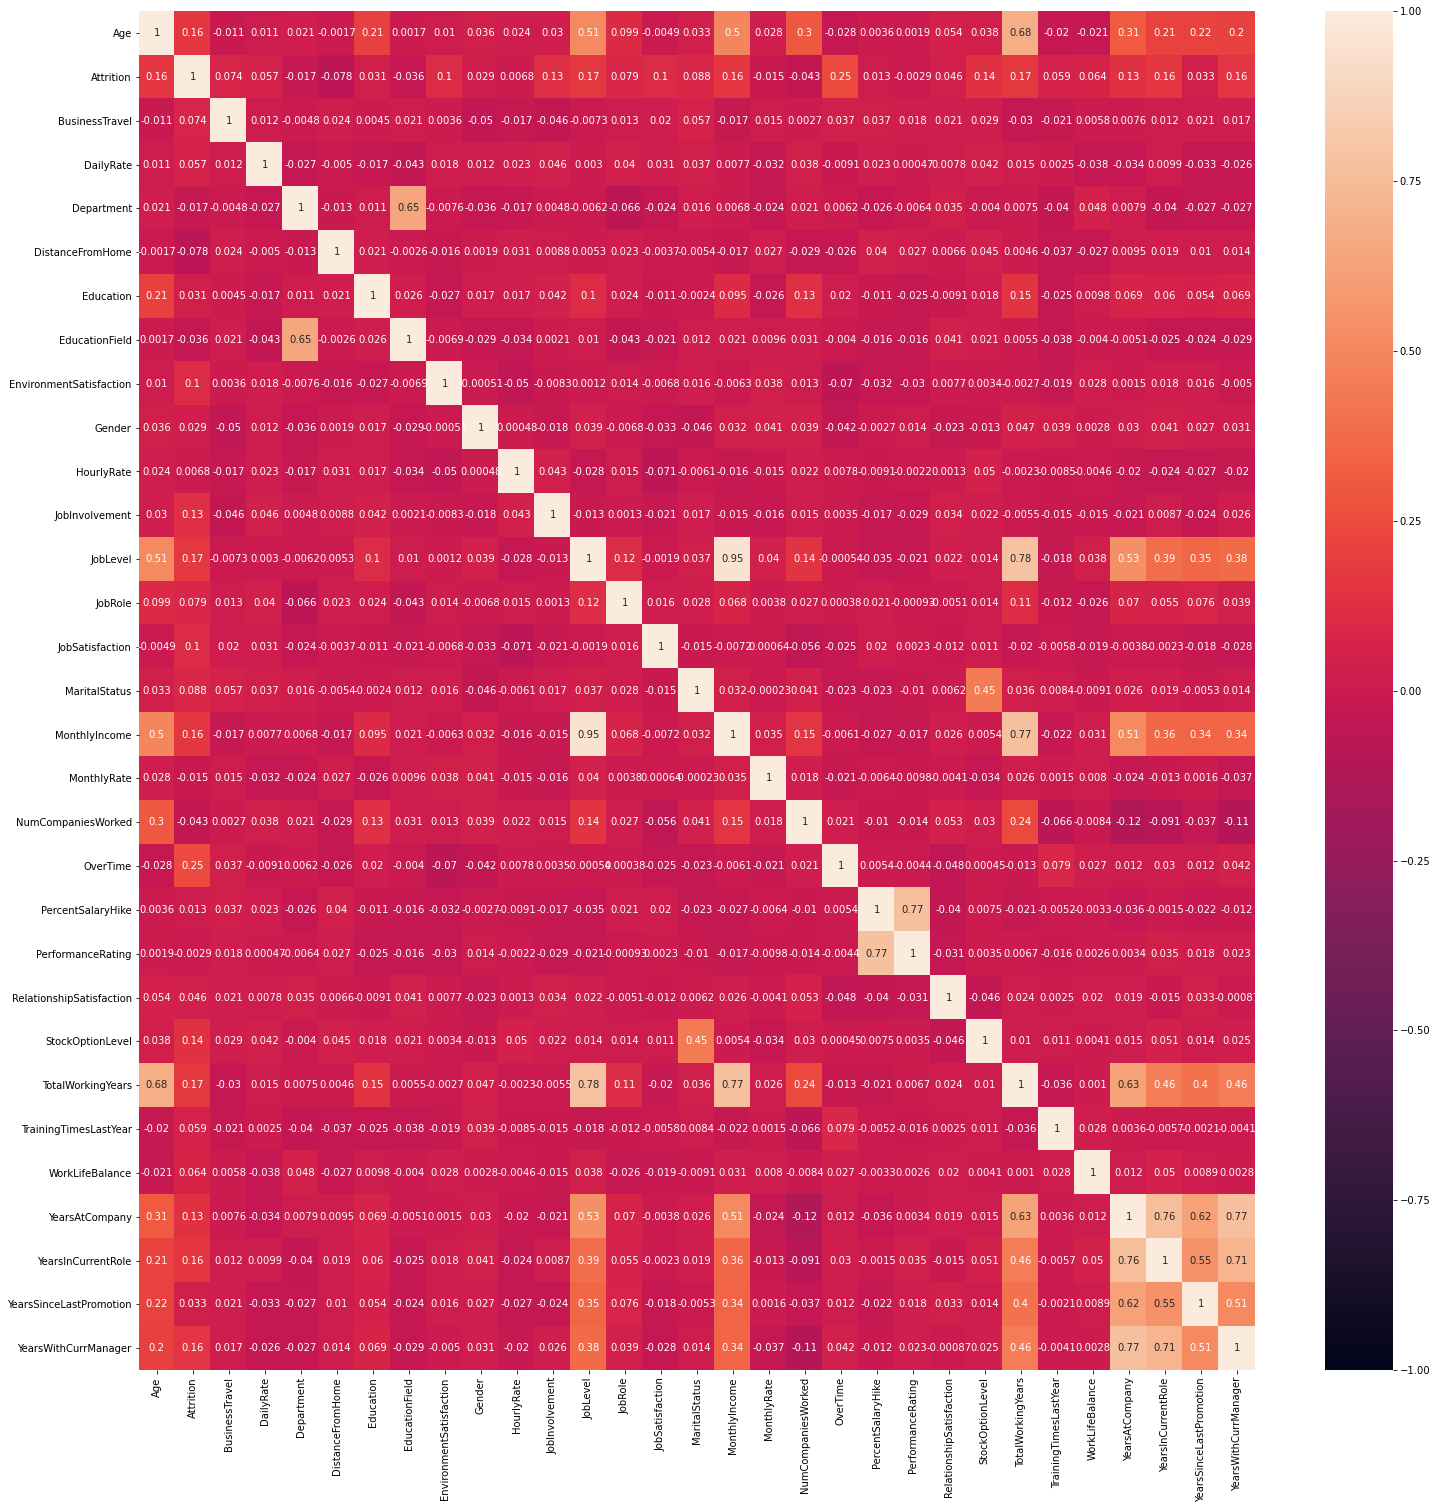

In [210]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### In heat Map we can draw inferences that Job Level and Age has good correlation with Total working years as its obvious that with increase in years of working, level of job increases and at the same time age is also increasing.

In [211]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,1,0,279,0,8,1,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,0,2,2,0,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,1,0,1392,0,3,4,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,0,2,1,0,1,0,...,3,4,1,6,3,3,2,2,2,2


In [212]:
from scipy.stats import skew

In [213]:
# storing all continous columns in a single variable
con_datanew=['Age','DailyRate','DistanceFromHome','Education',
                 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction',
                 'MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
                 'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [214]:
# to see skewness for every continous column stored in con_datanew
for col in con_datanew:
    print(col)
    print(skew(df[col]))

Age
0.41286446154785084
DailyRate
-0.003514976958291024
DistanceFromHome
0.9571400469829039
Education
-0.2893854052028825
EnvironmentSatisfaction
-0.3213261358382832
HourlyRate
-0.03227797319055416
JobInvolvement
-0.4979106286269671
JobLevel
1.0243546583925869
JobSatisfaction
-0.3293354633089524
MonthlyIncome
1.3684185123330814
MonthlyRate
0.01855884556846042
NumCompaniesWorked
1.0254233954371303
PercentSalaryHike
0.8202898522796266
PerformanceRating
1.9199210412109473
RelationshipSatisfaction
-0.3025184698222079
StockOptionLevel
0.9679912809556104
TotalWorkingYears
1.11603155825941
TrainingTimesLastYear
0.5525595985771926
WorkLifeBalance
-0.5519163838185224
YearsAtCompany
1.7627284034822992
YearsInCurrentRole
0.9164268059808774
YearsSinceLastPromotion
1.982264623462895
YearsWithCurrManager
0.8326002906209379


In [215]:
# removing the skewness for continous columns using quantile method

q = df['DistanceFromHome'].quantile(0.95)
# removing the top 5% data from the DistanceFromHome column
df= df[df['DistanceFromHome']<q]

q = df['YearsAtCompany'].quantile(0.94)
# removing the top 6% data from the YearsAtCompany column
df= df[df['YearsAtCompany']<q]

q = df['YearsInCurrentRole'].quantile(0.96)
# removing the top 4% data from the YearsInCurrentRole column
df= df[df['YearsInCurrentRole']<q]

In [216]:
y=df['Attrition']
X=df.drop('Attrition', axis=1)

In [217]:
# Data Scaling.  Formula Z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [218]:
X_scaled # to see representation of X_scaled data, how it looks like

array([[ 0.54348771, -0.33181334,  0.74406324, ...,  0.21837392,
        -0.67950822,  0.52701134],
       [ 1.42068965, -0.33181334, -1.3076893 , ...,  1.29119076,
        -0.23995359,  1.1946685 ],
       [ 0.10488675, -0.33181334,  1.41967069, ..., -1.21204854,
        -0.67950822, -1.14213154],
       ...,
       [-0.99161567, -0.33181334, -1.61682334, ..., -0.49683731,
        -0.67950822, -0.14064581],
       [ 1.42068965, -0.33181334,  0.54711494, ...,  0.93358515,
        -0.67950822,  1.52849708],
       [-0.22406398, -0.33181334, -0.43762656, ..., -0.13923169,
        -0.23995359, -0.47447439]])

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

# let check the values
vif

,vif,features
0,1.889350,Age
1,1.021018,BusinessTravel
2,1.025343,DailyRate
3,1.703306,Department
4,1.022709,DistanceFromHome
5,1.067714,Education
6,1.695181,EducationField
7,1.019910,EnvironmentSatisfaction
8,1.025371,Gender
9,1.029115,HourlyRate


#### Multicollinearity problem exists here. 'Job Level' and 'Monthly Income' are inter related to each other.

In [221]:
# dropping Monthly Income column to avoid multicollinearity problem
df=df.drop(columns=['MonthlyIncome'])

In [222]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=101)

In [223]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [224]:
y_pred = log_reg.predict(x_test)

In [225]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8524590163934426

In [226]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.83538084 0.83783784 0.83990148]
0.8377067170170619
0.0018478720277130736


In [227]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[ 21,  36],
       [  9, 239]], dtype=int64)

In [228]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.70      0.37      0.48        57
           1       0.87      0.96      0.91       248

    accuracy                           0.85       305
   macro avg       0.78      0.67      0.70       305
weighted avg       0.84      0.85      0.83       305



## Using Decision Tree Classifier

In [229]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    155.0  760.0       1.0      915.0         915.0
______________________________________________
Confusion Matrix:
 [[155   0]
 [  0 760]]


===================Test Result======================
Accuracy Score: 73.77%
______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.323077    0.850000  0.737705    0.586538      0.751526
recall      0.368421    0.822581  0.737705    0.595501      0.737705
f1-score    0.344262    0.836066  0.737705    0.590164      0.744155
support    57.000000  248.000000  0.737705 

In [230]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.78278689 0.77459016 0.78278689 0.77868852 0.81557377]
0.7868852459016394
0.014662740836064173


## Random Forest Classifier

In [231]:
rand_clf = RandomForestClassifier(random_state=41)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    155.0  760.0       1.0      915.0         915.0
______________________________________________
Confusion Matrix:
 [[155   0]
 [  0 760]]


===================Test Result======================
Accuracy Score: 83.93%
______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.833333    0.839590  0.839344    0.836462      0.838421
recall      0.175439    0.991935  0.839344    0.583687      0.839344
f1-score    0.289855    0.909427  0.839344    0.599641      0.793638
support    57.000000  248.000000  0.839344 

In [232]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.83606557 0.85655738 0.8647541  0.84016393 0.84836066]
0.8491803278688523
0.01049692497939811


### Using GridSearchCV for hyper parameter tuning on best model (Random Forest Classifier) as its CV score & accuracy score is having least difference

In [233]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,30,3),              
    'min_samples_leaf' : range (1,30,2),
    'min_samples_split' : range (2,30,2)
}

In [234]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [235]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 3),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [250]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [251]:
rand_clf = RandomForestClassifier(max_depth =8, min_samples_leaf=1, min_samples_split=4)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=4)

In [252]:
rand_clf.score(x_test,y_test)

0.8426229508196721

## KNN Classifier

In [239]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 86.34%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.750000    0.871345  0.863388    0.810673      0.850789
recall       0.290323    0.980263  0.863388    0.635293      0.863388
f1-score     0.418605    0.922601  0.863388    0.670603      0.837224
support    155.000000  760.000000  0.863388  915.000000    915.000000
______________________________________________
Confusion Matrix:
 [[ 45 110]
 [ 15 745]]


===================Test Result======================
Accuracy Score: 83.61%
______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.733333    0.841379  0.836066    0.787356      0.821187
recall      0.192982    0.983871  0.836066    0.588427      0.836066
f1-score    0.305556    0.907063  0.836066    0.606309    

In [240]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.79918033 0.82377049 0.81967213 0.81147541 0.83196721]
0.8172131147540984
0.011178837456545757


In [241]:
# using bagging over our KNN classifier and see if our score improve:

In [242]:
from sklearn.ensemble import BaggingClassifier

In [243]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True,random_state=3,oob_score=True)

In [244]:
# lets check the out of bag score
bag_knn.oob_score

True

In [245]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.8327868852459016

## SVC

In [246]:
from sklearn.svm import SVC

In [247]:
svc = SVC(kernel = 'linear',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 87.76%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.747126    0.891304  0.877596    0.819215      0.866881
recall       0.419355    0.971053  0.877596    0.695204      0.877596
f1-score     0.537190    0.929471  0.877596    0.733331      0.863019
support    155.000000  760.000000  0.877596  915.000000    915.000000
______________________________________________
Confusion Matrix:
 [[ 65  90]
 [ 22 738]]


===================Test Result======================
Accuracy Score: 84.92%
______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.689655    0.865942   0.84918    0.777799      0.832997
recall      0.350877    0.963710   0.84918    0.657293      0.849180
f1-score    0.465116    0.912214   0.84918    0.688665    

In [253]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.85012285 0.83783784 0.83251232]
0.8401576677438746
0.007374231826087759


## Gradient Boosting Classifier

In [254]:
from sklearn.ensemble import GradientBoostingClassifier

In [255]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")



===================Train Result======================
Accuracy Score: 96.94%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.964467  0.969399    0.982234      0.970486
recall       0.819355    1.000000  0.969399    0.909677      0.969399
f1-score     0.900709    0.981912  0.969399    0.941311      0.968156
support    155.000000  760.000000  0.969399  915.000000    915.000000
______________________________________________
Confusion Matrix:
 [[127  28]
 [  0 760]]


===================Test Result======================
Accuracy Score: 83.28%
______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.636364    0.848057  0.832787    0.742210      0.808494
recall      0.245614    0.967742  0.832787    0.606678      0.832787
f1-score    0.354430    0.903955  0.832787    0.629193    

## Stochastic Gradient Descent

In [287]:
from sklearn.linear_model import SGDClassifier

In [288]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7836065573770492

In [289]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.41277641 0.17690418 0.82758621]
0.47242226552571376
0.2689671564229766


## PCA

In [265]:
scaler = StandardScaler()
X=df.drop('Attrition', axis=1)
X_scaled = scaler.fit_transform(X)

In [266]:
from sklearn.decomposition import PCA

In [267]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 2.54245347e-01,  1.10043260e+00, -7.89954614e-01, ...,
        -3.26678608e-01, -9.45176539e-01, -5.23523364e-02],
       [ 1.78946711e+00, -1.18431071e+00,  3.05035742e+00, ...,
        -3.49754196e-02, -5.83943194e-01,  1.68449570e-01],
       [-2.54109461e+00,  1.13124358e+00, -9.08031784e-02, ...,
         3.06433236e-01,  5.26145427e-02, -1.28500611e-01],
       ...,
       [-8.44928593e-01, -7.61821775e-01,  2.63314237e+00, ...,
        -6.04589933e-01, -3.33101205e-01,  4.36129872e-01],
       [ 2.01530623e+00,  1.10869291e-01, -4.38573961e-01, ...,
         2.84634190e-02,  8.81688377e-02, -2.13794755e-01],
       [-7.55186830e-01, -3.02951151e-01, -7.57080330e-01, ...,
        -2.49603774e-01, -3.83593841e-01,  2.63947950e-03]])

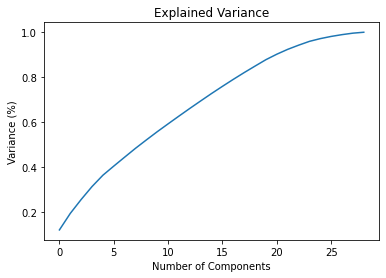

In [268]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 95% of the variance is being explained by 25 components

In [269]:
pca=PCA(n_components=25)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24','PC-25'])

In [270]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25
0,0.254245,1.100433,-0.789955,-0.691842,-1.098760,1.418667,-1.371418,0.773617,-2.810576,1.492674,...,1.533379,0.248239,0.474548,-0.683181,-0.188961,1.538011,1.188447,0.223576,0.056245,0.066921
1,1.789467,-1.184311,3.050357,0.410231,-0.167717,0.181182,1.042581,0.855361,1.610726,-0.936531,...,-0.068355,0.050221,-0.036889,0.157502,-0.246040,-0.199180,0.390583,-1.304547,1.194219,-0.281190
2,-2.541095,1.131244,-0.090803,-0.616962,-0.582879,0.524274,0.232677,-0.247833,-1.105143,0.482741,...,0.304289,-1.241362,-1.297062,-0.369639,0.495745,1.345497,0.430485,0.398249,0.293587,-0.278913
3,0.169480,-0.828748,-1.171732,-0.504986,-1.054572,1.215406,0.606743,1.437268,-0.582538,0.741813,...,0.404362,-0.173498,0.851846,1.335027,0.347559,0.025665,-0.056403,0.204605,0.182160,-0.096717
4,-1.564550,0.218544,-0.923297,0.115229,-0.523781,-0.825480,0.289655,-0.535057,0.513053,-0.489914,...,-0.309851,2.716945,-0.463721,-0.393334,0.395281,2.367091,0.196708,-0.687545,-0.694226,0.143899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-0.085866,0.601469,0.254692,-0.235361,0.055632,0.854361,-0.394504,-0.769539,1.175205,0.509212,...,-1.203655,0.754243,-1.622718,-1.054523,-0.198918,-0.094994,0.231829,-0.609932,-0.171457,-0.031699
1216,1.793310,-0.304223,-0.467949,-0.631987,-0.474554,0.090227,1.927170,0.722235,1.881955,0.220703,...,-1.893704,0.597094,0.744079,-0.277125,0.909214,0.776614,0.989479,-1.221173,-0.083490,0.028892
1217,-0.844929,-0.761822,2.633142,0.181348,0.355492,-0.451601,-1.879773,0.105511,-1.070217,-2.153063,...,1.062341,0.364272,0.466755,-0.938828,0.879199,-0.738968,0.108636,-0.289619,-0.868403,0.167240
1218,2.015306,0.110869,-0.438574,0.014368,-1.088522,0.438031,-0.034025,-0.405506,0.185397,0.286313,...,-0.867858,-0.554919,-0.163924,0.752298,-0.428030,-1.011701,1.239355,-0.453278,1.102343,-0.238760


## Lets plot ROC AUC Curve to choose the best model

In [271]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [272]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [273]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [274]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.6964134125636672

In [275]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

1.0

In [276]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

1.0

In [277]:
# KneighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.6363186191284663

In [278]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

0.9912280701754386

In [279]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.7425014148273912

## Lets check ROC AUC curve for the fitted model

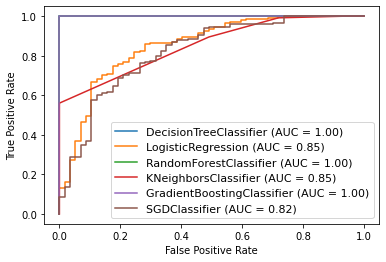

In [280]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

#### Choosing Random Forest Classifier as the model to save for production as its model understanding capacity is 100% and giving good accuracy score than other models. 

## Model Saving

In [291]:
# saving the model to local system
filename = 'HR Analytics_model.pickle'
pickle.dump(rand_clf,open(filename,'wb'))